In [109]:
import numpy as np
import matplotlib.pyplot as plt
from policy import FinitePolicy
from markov_decision_process import FiniteMarkovDecisionProcess
from distribution import Categorical, SampledDistribution, FiniteDistribution
from typing import (Callable, Dict, Generic, Iterator, Iterable,
                    Mapping, Optional, Sequence, Tuple, TypeVar)

In [202]:
# for simplicity, we let 0 denotes action A and 1 denotes action B
# create 2^{n-1} policies
n = 9; state_space = range(n+1); non_terminal_state_space = range(1,n)
num_policy = 2**n

def invert2(k,n):
    b = np.zeros((n,1))
    for i in range (n):
        b[[n-i-1],0] = int(k%2)
        k = k // 2
    return b

for k in range (num_policy):
    policy_map[k] = {}
    action = invert2(k,n)
    for i in non_terminal_state_space:
        state_prob_map = {}
        state_prob_map[0] = int(action[[i],0])
        state_prob_map[1] = int(1-action[[i],0])
        policy_map[k][i] = Categorical(state_prob_map)

In [203]:
Policy = FinitePolicy(policy_map[1])

In [204]:
# create transition_reward map
action_reward_map = {}
for i in non_terminal_state_space:
    transition_map = {}
    # action A
    state_prob_map = {}
    if i-1 == 0:
        state_prob_map[(i-1,-1)] = i/n
        state_prob_map[(i+1,0)] = 1 - i/n
    elif i+1 == n:
        state_prob_map[(i-1,0)] = i/n
        state_prob_map[(i+1,1)] = 1 - i/n
    else:
        state_prob_map[(i-1,0)] = i/n
        state_prob_map[(i+1,0)] = 1 - i/n
    transition_map[0] = Categorical(state_prob_map)
    
    # action B
    state_prob_map = {}
    for j in state_space:
        if j != i:
            if j == 0:
                state_prob_map[(j,-1)] = 1/n
            elif j == n:
                state_prob_map[(j,1)] = 1/n
            else:
                state_prob_map[(j,0)] = 1/n
    transition_map[1] = Categorical(state_prob_map)
    action_reward_map[i] = transition_map

In [205]:
# create a policy-implied Finite MRP for each of these deterministic policies
MFP = FiniteMarkovDecisionProcess(action_reward_map)
FMRP = MFP.apply_finite_policy(Policy)   # implied finite markov reward process
gamma = 1
value_of_fixed_policy = FMRP.get_value_function_vec(gamma)

In [206]:
# Find the Optimal Value Function and the Optimal Deterministic Policy
Value_whole = np.zeros((num_policy,len(non_terminal_state_space)))
for k in range (num_policy):
    Policy = FinitePolicy(policy_map[k])
    FMRP = MFP.apply_finite_policy(Policy)
    value_of_fixed_policy = FMRP.get_value_function_vec(1)
    Value_whole[[k],:] = value_of_fixed_policy

In [207]:
loc = np.argmax(Value_whole.sum(axis=1))
optimal_policy = policy_map[loc]
print("optimal policy is:")
print(optimal_policy)
optimal_value_function = Value_whole[[loc],:]
print("optimal value function is:")
print(optimal_value_function)

optimal policy is:
{1: {0: 0.0, 1: 1.0}, 2: {0: 1.0, 1: 0.0}, 3: {0: 1.0, 1: 0.0}, 4: {0: 1.0, 1: 0.0}, 5: {0: 1.0, 1: 0.0}, 6: {0: 1.0, 1: 0.0}, 7: {0: 1.0, 1: 0.0}, 8: {0: 1.0, 1: 0.0}}
optimal value function is:
[[0.35135135 0.41047297 0.42736486 0.43581081 0.44256757 0.45101351
  0.46790541 0.52702703]]


In [159]:
#plot a graph of the Optimal Escape-Probability and of the associated Optimal Croak

Since V(s) = Prob(escape|s) - Prob(eatten|s), and Prob(escape|s) + Prob(eatten|s) = 1, we have Prob(escape|s) = (1+V(s))/2

(0.0, 1.0)

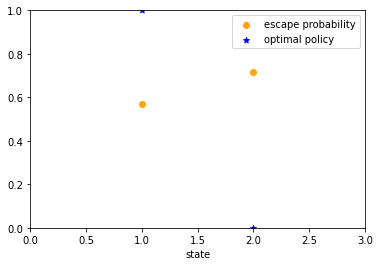

In [193]:
# n = 3
prob_escape_3 = ((1+optimal_value_function)/2).T
optimal_croak_3 = [1,0]
plt.scatter(list(non_terminal_state_space),prob_escape_3.tolist(), marker="o", color='orange')
plt.scatter(list(non_terminal_state_space),optimal_croak_3, marker="*", color='b')
plt.xlabel("state")
plt.legend(["escape probability", "optimal policy"])
plt.xlim([0,n])
plt.ylim([0,1])

(0.0, 1.0)

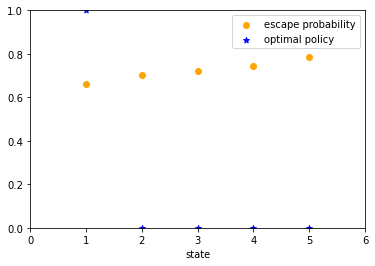

In [201]:
# n = 6
prob_escape_6 = ((1+optimal_value_function)/2).T
optimal_croak_6 = [1,0,0,0,0]
plt.scatter(list(non_terminal_state_space),prob_escape_6.tolist(), marker="o", color='orange')
plt.scatter(list(non_terminal_state_space),optimal_croak_6, marker="*", color='b')
plt.xlabel("state")
plt.legend(["escape probability", "optimal policy"])
plt.xlim([0,n])
plt.ylim([0,1])

(0.0, 1.0)

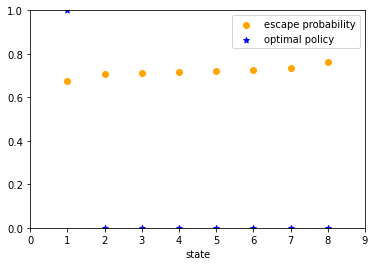

In [210]:
# n = 9
prob_escape_9 = ((1+optimal_value_function)/2).T
optimal_croak_9 = [1,0,0,0,0,0,0,0]
plt.scatter(list(non_terminal_state_space),prob_escape_9.tolist(), marker="o", color='orange')
plt.scatter(list(non_terminal_state_space),optimal_croak_9, marker="*", color='b')
plt.xlabel("state")
plt.legend(["escape probability", "optimal policy"])
plt.xlim([0,n])
plt.ylim([0,1])